# Machine Learning Capstone Project

**Sentiment Analysis of Yelp review dataset from Kaggle**

**Domain Background:**
Natural language processing (or NLP) serves numerous use cases when dealing with text or unstructured text data. My project will examine Yelp review dataset from Kaggle.https://www.kaggle.com/c/yelp- recsys-2013#description
The core of the project is an algorithm to predict ratings and the requirement is to create a model to predict the rating a user would assign to a restaurant.

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users.

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive. In other words, it is a rating of the review itself, not a rating of the business. The "useful" and "funny" columns are similar to the "cool" column.


# STEP 1: Exploratory Data Analysis

In [1]:
%pylab inline
import pandas as pd
import os

# data visualization
import matplotlib.pyplot as plt

# Seaborn
import seaborn as sns
#String
import string

#numpy and pandas
import numpy as np
import pandas as pd

#ntlk
import nltk
nltk.download()
from nltk.corpus import stopwords

Populating the interactive namespace from numpy and matplotlib
showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [2]:
yelp = pd.read_csv('yelp.csv')

In [3]:
yelp.shape

(10000, 10)

# STEP 2: Basic Statistics

In [4]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [5]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [6]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


### Let's look into the distribution of positive and negative sores by considering 1 star and 5 star data##

mean = 624.997902307
std = 558.494884583


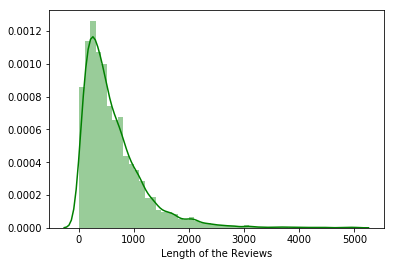

In [7]:
# Distribution of positive scores
df = pd.read_csv("yelp.csv",usecols=[3,4])
df.columns = ['stars','text']
df['len'] = [len(x) for x in df['text']]
pos = df[(df['stars'] == 5)]
plot = sns.distplot(pos['len'],label='Distribution of Positive Scores',axlabel='Length of the Reviews',color="g")
fig = plot.get_figure()
fig.savefig("pos_distribution.png")
print ('mean =',mean(pos['len']))
print ('std =', std(pos['len']))

mean = 826.515353805
std = 742.433190814


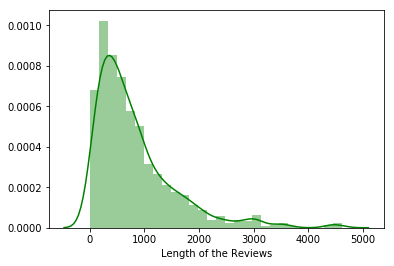

In [8]:
#Distribution of negative scores
df = pd.read_csv("yelp.csv",usecols=[3,4])
df.columns = ['stars','text']
df['len'] = [len(x) for x in df['text']]
pos = df[(df['stars'] == 1)]
plot = sns.distplot(pos['len'],label='Distribution of Negative Scores',axlabel='Length of the Reviews',color="g")
fig = plot.get_figure()
fig.savefig("pos_distribution.png")
print ('mean =',mean(pos['len']))
print ('std =', std(pos['len']))

### Create a new column called "text length" which is the number of words in the text column.

In [9]:
yelp['text length'] = yelp['text'].apply(len)

In [10]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


**Seaborn’s FacetGrid allows us to create a grid of histograms placed side by side. We can use FacetGrid to see if there’s any relationship between text length feature and the stars rating.**

# STEP 3: Visualizations

Analysis of distribution of data and identifying correlations with data

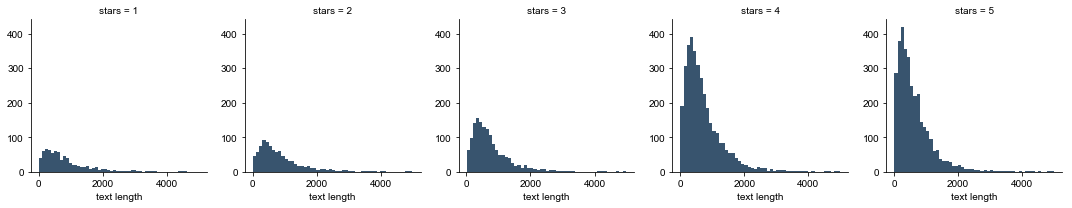

In [11]:
g = sns.FacetGrid(data=yelp, col='stars')
sns.set_style('white')
g.map(plt.hist, 'text length', bins=50, color='#38546E')

***The distribution seems to be similar across all ratings, however the number of 4 and 5 star reviews seems to be more***

**Create a boxplot of text length for each star category.**

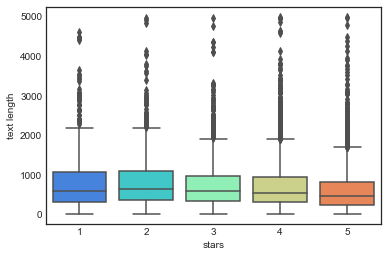

In [12]:
sns.boxplot(x='stars',y='text length',data=yelp,palette='rainbow')

**From the plot above, looks like  1-star and 2-star ratings have much longer text, but there are many outliers (which can be seen as points above the boxes). Because of this, maybe text length won’t be such a useful feature to consider after all.**

**Create a countplot of the number of occurrences for each type of star rating.**

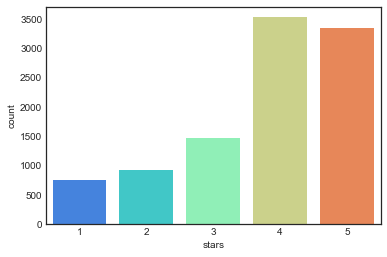

In [13]:
sns.countplot(x='stars',data=yelp,palette='rainbow')

** Use groupby to get the mean values of the numerical columns**

In [14]:
stars = yelp.groupby('stars').mean()
stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.997902


**Use the corr() method on that groupby dataframe to produce a dataframe:**

In [15]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857663
useful,-0.743329,1.000000,0.894506,0.699879
funny,-0.944939,0.894506,1.000000,0.843460
text length,-0.857663,0.699879,0.843460,1.000000


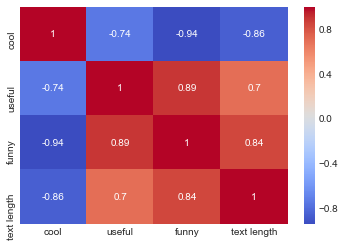

In [16]:
sns.heatmap(stars.corr(),cmap='coolwarm',annot=True)

**Looking at the map, funny is strongly correlated with useful, and useful seems strongly correlated with text length. We can also see a negative correlation between cool and the other three features**

## STEP 4 - Clean data & NLP Classification Task

**Create a dataframe called yelp_class that contains the columns of yelp dataframe but for only the 1 or 5 star reviews.**

In [17]:
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]

Create two objects X and y. X will be the 'text' column of yelp_class and y will be the 'stars' column of yelp_class. i.e features and target/labels

In [18]:
yelp_class.shape

(4086, 11)

**We can see from .shape that yelp_class only has 4086 reviews, compared to the 10,000 reviews in the original dataset. This is because we aren’t taking into account the reviews rated 2, 3, and 4 stars.**

In [19]:
yelp_class['stars'].unique()

array([5, 1])

In [20]:
X = yelp_class['text']
y = yelp_class['stars']

In [21]:
X[0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

### The function below removes punctuation, stopwords and returns a list of remaining words or tokens###

In [22]:
def text_process(text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in text if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [23]:
print(text_process(X[0]))

['wife', 'took', 'birthday', 'breakfast', 'excellent', 'weather', 'perfect', 'made', 'sitting', 'outside', 'overlooking', 'grounds', 'absolute', 'pleasure', 'waitress', 'excellent', 'food', 'arrived', 'quickly', 'semibusy', 'Saturday', 'morning', 'looked', 'like', 'place', 'fills', 'pretty', 'quickly', 'earlier', 'get', 'better', 'favor', 'get', 'Bloody', 'Mary', 'phenomenal', 'simply', 'best', 'Ive', 'ever', 'Im', 'pretty', 'sure', 'use', 'ingredients', 'garden', 'blend', 'fresh', 'order', 'amazing', 'EVERYTHING', 'menu', 'looks', 'excellent', 'white', 'truffle', 'scrambled', 'eggs', 'vegetable', 'skillet', 'tasty', 'delicious', 'came', '2', 'pieces', 'griddled', 'bread', 'amazing', 'absolutely', 'made', 'meal', 'complete', 'best', 'toast', 'Ive', 'ever', 'Anyway', 'cant', 'wait', 'go', 'back']


**There are no punctuations or stopwords, and the remaining words are returned to us as a list of tokens.**

### Vectorization ###

**At the moment, we have our reviews as lists of tokens. To enable Scikit-learn algorithms to work on our text, we need to convert each review into a vector.Import CountVectorizer and create a CountVectorizer object**

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
cv = CountVectorizer(analyzer=text_process).fit(X)

**Size of vocabulary in the vector**

In [26]:
# Print total number of vocab words
print(len(cv.vocabulary_))

26435


### Example working of vectorisation object###

In [27]:
review3 = X[3]
print(review3)

Rosie, Dakota, and I LOVE Chaparral Dog Park!!! It's very convenient and surrounded by a lot of paths, a desert xeriscape, baseball fields, ballparks, and a lake with ducks.

The Scottsdale Park and Rec Dept. does a wonderful job of keeping the park clean and shaded.  You can find trash cans and poopy-pick up mitts located all over the park and paths.

The fenced in area is huge to let the dogs run, play, and sniff!


In [28]:
review3 = X[3]
print(review3)

Rosie, Dakota, and I LOVE Chaparral Dog Park!!! It's very convenient and surrounded by a lot of paths, a desert xeriscape, baseball fields, ballparks, and a lake with ducks.

The Scottsdale Park and Rec Dept. does a wonderful job of keeping the park clean and shaded.  You can find trash cans and poopy-pick up mitts located all over the park and paths.

The fenced in area is huge to let the dogs run, play, and sniff!


**Now let's see its vector representation:**

In [29]:
reviewvec = cv.transform([review3])
print(reviewvec)
print(reviewvec.shape)

  (0, 2038)	1
  (0, 2591)	1
  (0, 2699)	1
  (0, 2787)	1
  (0, 4782)	1
  (0, 6122)	2
  (0, 6683)	1
  (0, 6864)	1
  (0, 7159)	1
  (0, 9564)	1
  (0, 9953)	1
  (0, 10044)	1
  (0, 11055)	1
  (0, 11640)	1
  (0, 12185)	1
  (0, 13038)	1
  (0, 13417)	1
  (0, 13637)	1
  (0, 14536)	1
  (0, 14565)	1
  (0, 14618)	1
  (0, 16493)	1
  (0, 17201)	1
  (0, 17290)	1
  (0, 17455)	1
  (0, 17660)	1
  (0, 17852)	1
  (0, 17928)	1
  (0, 18637)	1
  (0, 19841)	2
  (0, 19917)	2
  (0, 20354)	1
  (0, 20470)	1
  (0, 21961)	1
  (0, 22494)	1
  (0, 23027)	1
  (0, 23987)	1
  (0, 24909)	1
  (0, 26170)	1
  (0, 26284)	1
(1, 26435)


In [30]:
print(cv.get_feature_names()[2038])
print(cv.get_feature_names()[19917])

Chaparral
paths


In [31]:
X = cv.fit_transform(X)

We use .transform on our Bag-of-Words transformed object and transform the entire DataFrame of messages. Let's go ahead and check out how the bag-of-words counts for the entire sparse matrix:

In [32]:
print('Shape of Sparse Matrix: ', X.shape)

Shape of Sparse Matrix:  (4086, 26435)


## Train Test Split

Let's split our data into training and testing data.

** Use train_test_split to split up the data into X_train, X_test, y_train, y_test. Use test_size=0.3 and random_state=101 **

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

**Multinomial Naive Bayes is a specialised version of Naive Bayes designed more for text documents. Here, we build a Multinomial Naive Bayes model and fit it to our training set (X_train and y_train).**

In [35]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

**Now fit nb using the training data.**

In [36]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Model Evaluation

Time to see how our model did!

**Use the predict method off of nb to predict labels from X_test.**

In [37]:
predictions = nb.predict(X_test)

** Create a confusion matrix and classification report using these predictions and y_test **

In [38]:
from sklearn.metrics import confusion_matrix,classification_report

In [39]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[157  71]
 [ 24 974]]


             precision    recall  f1-score   support

          1       0.87      0.69      0.77       228
          5       0.93      0.98      0.95       998

avg / total       0.92      0.92      0.92      1226



### Predicting Positive Review ###

In [40]:
positive_review = yelp_class['text'][1]
positive_review

'I have no idea why some people give bad reviews about this place. It goes to show you, you can please everyone. They are probably griping about something that their own fault...there are many people like that.\n\nIn any case, my friend and I arrived at about 5:50 PM this past Sunday. It was pretty crowded, more than I thought for a Sunday evening and thought we would have to wait forever to get a seat but they said we\'ll be seated when the girl comes back from seating someone else. We were seated at 5:52 and the waiter came and got our drink orders. Everyone was very pleasant from the host that seated us to the waiter to the server. The prices were very good as well. We placed our orders once we decided what we wanted at 6:02. We shared the baked spaghetti calzone and the small "Here\'s The Beef" pizza so we can both try them. The calzone was huge and we got the smallest one (personal) and got the small 11" pizza. Both were awesome! My friend liked the pizza better and I liked the ca

In [41]:
positive_review_transformed = cv.transform([positive_review])
positive_review_transformed

<1x26435 sparse matrix of type '<class 'numpy.int64'>'
	with 90 stored elements in Compressed Sparse Row format>

In [42]:
nb.predict(positive_review_transformed)[0]

5

### Predicting Negative Review ###

In [43]:
negative_review = yelp_class['text'][281]
negative_review

'Still quite poor both in service and food. maybe I made a mistake and ordered Sichuan Gong Bao ji ding for what seemed like people from canton district. Unfortunately to get the good service U have to speak Mandarin/Cantonese. I do speak a smattering but try not to use it as I never feel confident about the intonation. \n\nThe dish came out with zichini and bell peppers (what!??)  Where is the peanuts the dried fried red peppers and the large pieces of scallion. On pointing this out all I got was " Oh you like peanuts.. ok I will put some on" and she then proceeded to get some peanuts and sprinkle it on the chicken.\n\nWell at that point I was happy that atleast the chicken pieces were present else she would probably end up sprinkling raw chicken pieces on it like the raw peanuts she dumped on top of the food. \n\nWell then  I spoke a few chinese words and the scowl turned into a smile and she then became a bit more friendlier. \n\nUnfortunately I do not condone this type of behavior.

In [44]:
negative_review_transformed = cv.transform([negative_review])
negative_review_transformed

<1x26435 sparse matrix of type '<class 'numpy.int64'>'
	with 78 stored elements in Compressed Sparse Row format>

In [45]:
nb.predict(negative_review_transformed)[0]

1

### Logistic Regression ###

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Model Evaluation###

In [48]:
predictions = logmodel.predict(X_test)

In [49]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[155  73]
 [ 26 972]]
             precision    recall  f1-score   support

          1       0.86      0.68      0.76       228
          5       0.93      0.97      0.95       998

avg / total       0.92      0.92      0.92      1226



## What Next?

**Is our model fool-proof? No. check below**

In [ ]:
negative_review = yelp_class['text'][140]
negative_review

In [ ]:
negative_review_predict= cv.transform([negative_review])
nb.predict(negative_review_predict)[0]

**Our model thinks this is positive, but actually it isn't. Our model though accurate, but is more biased towards positive reviews compared to negative ones.**

### Conclusion###

Overall we have seen the models perform similarly on our yelp data set. Our model though accurate, but is more biased towards positive reviews compared to negative ones.

### References###
Dataset obtained from: Kaggle: Yelp Business Rating Prediction https://www.kaggle.com/c/yelp-recsys-2013 